You are given house_price.csv which contains property prices in the city of Bangalore. You need to examine price per square feet do the following:
Detect the outliers and remove it using:
 Mean Function
Percentile method
IQR(Inter quartile range method)
Normal distribution
Zscore method
Also, plot the box plot(for all the numerical columns), histplot(to check the normality of the column(price per sqft column))
Check the correlation between all the numerical columns and plot heatmap.
Scatter plot between the variables to check the correlation betw
een them.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("house_price.csv")
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [4]:
df.dtypes

location           object
size               object
total_sqft        float64
bath              float64
price             float64
bhk                 int64
price_per_sqft      int64
dtype: object

In [5]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [6]:
df.tail()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
13195,Whitefield,5 Bedroom,3453.0,4.0,231.0,5,6689
13196,other,4 BHK,3600.0,5.0,400.0,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.0,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.0,4,10407
13199,Doddathoguru,1 BHK,550.0,1.0,17.0,1,3090


In [10]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


Mean and median has a remarkable difference in price per sqft, and standard deviation is pretty much high. so it has outliers

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


No null values and the price_per_sqft has datatype of integer

In [11]:
df.shape

(13200, 7)

## MEAN FUNCTION

In [10]:
mean = df['price_per_sqft'].mean()
std = df['price_per_sqft'].std()
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std

In [11]:
df_mean_outliers_removed = df[(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)]

In [12]:
rows_removed_mean = df.shape[0] - df_mean_outliers_removed.shape[0]
rows_removed_mean, df_mean_outliers_removed.describe()

(5,
          total_sqft         bath         price           bhk  price_per_sqft
 count  13195.000000  13195.00000  13195.000000  13195.000000    13195.000000
 mean    1555.884482      2.69064    112.267415      2.800152     6713.708602
 std     1237.196807      1.33853    149.200669      1.292344     4876.727718
 min       15.000000      1.00000      8.000000      1.000000      267.000000
 25%     1100.000000      2.00000     50.000000      2.000000     4266.500000
 50%     1275.000000      2.00000     71.740000      3.000000     5434.000000
 75%     1672.500000      3.00000    120.000000      3.000000     7313.000000
 max    52272.000000     40.00000   3600.000000     43.000000   200000.000000)

We have removed 5 rows which were outliers, using mean function

In [13]:
df_mean_outliers_removed

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


<Axes: xlabel='price_per_sqft', ylabel='Count'>

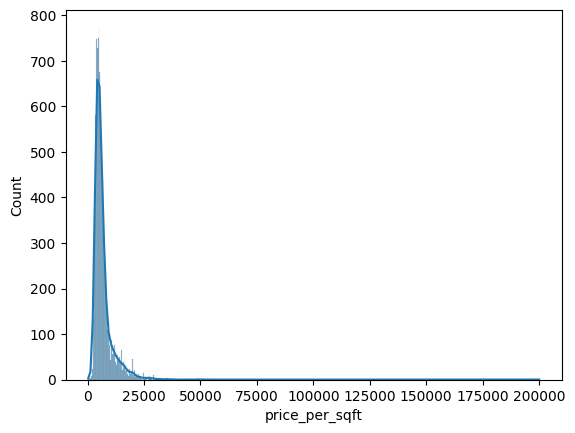

In [11]:
sns.histplot(data=df_mean_outliers_removed,x=df_mean_outliers_removed.price_per_sqft,kde=True)

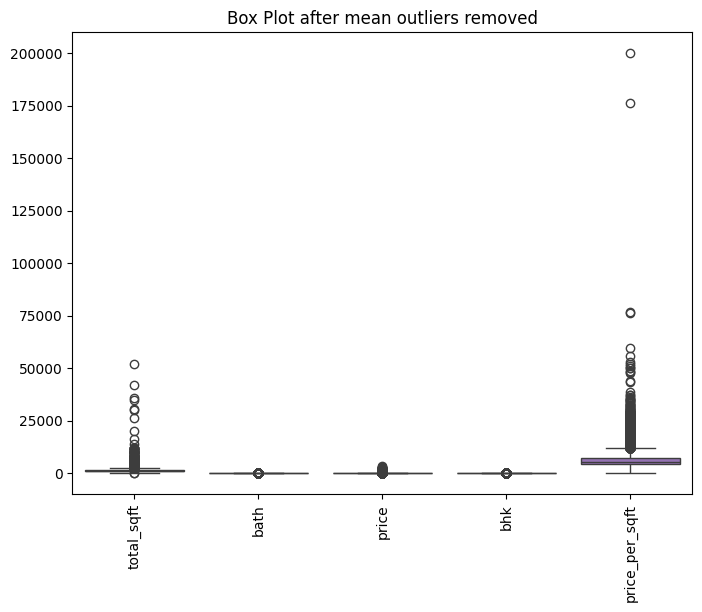

In [40]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_mean_outliers_removed)
plt.title('Box Plot after mean outliers removed')
plt.xticks(rotation=90)
plt.show()

## PERCENTILE

We are using 1st and 99th percentiles to identify outliers

In [4]:
lower_percentile = df['price_per_sqft'].quantile(0.01)
upper_percentile = df['price_per_sqft'].quantile(0.99)

In [5]:
df_percentile_outliers_removed = df[(df['price_per_sqft'] >= lower_percentile) & (df['price_per_sqft'] <= upper_percentile)]

In [6]:
rows_removed_percentile = df.shape[0] - df_percentile_outliers_removed.shape[0]
rows_removed_percentile, df_percentile_outliers_removed.describe()

(259,
          total_sqft          bath         price           bhk  price_per_sqft
 count  12941.000000  12941.000000  12941.000000  12941.000000    12941.000000
 mean    1529.261860      2.672359    106.685238      2.781392     6494.895139
 std      941.591068      1.264080    119.651740      1.210163     3502.061133
 min      250.000000      1.000000      8.000000      1.000000     2549.000000
 25%     1100.000000      2.000000     50.000000      2.000000     4285.000000
 50%     1275.000000      2.000000     71.130000      3.000000     5434.000000
 75%     1664.000000      3.000000    120.000000      3.000000     7252.000000
 max    30400.000000     27.000000   2340.000000     27.000000    23674.000000)

We have removed 259 rows using percentile method

In [7]:
df_percentile_outliers_removed

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


<Axes: xlabel='price_per_sqft', ylabel='Count'>

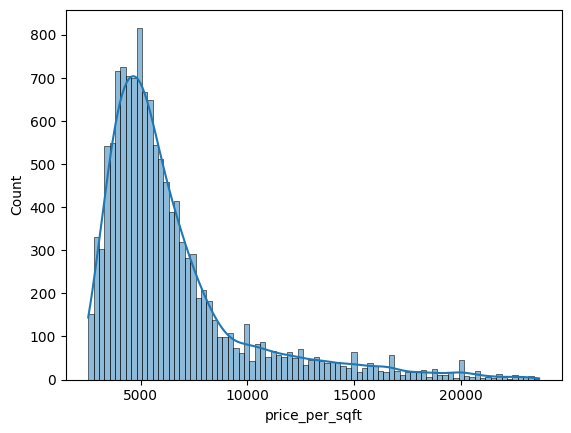

In [8]:
sns.histplot(data=df_percentile_outliers_removed,x=df_percentile_outliers_removed.price_per_sqft,kde=True)

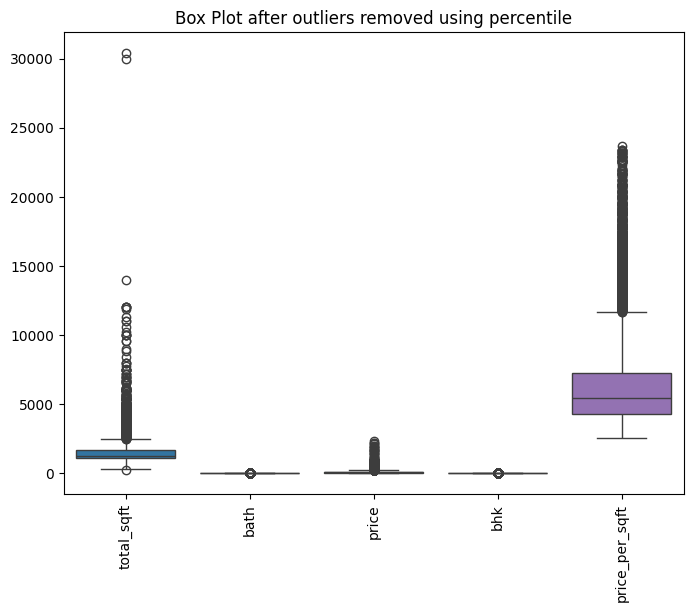

In [41]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_percentile_outliers_removed)
plt.title('Box Plot after outliers removed using percentile')
plt.xticks(rotation=90)
plt.show()

## IQR METHOD

In [19]:
 Q1 = df['price_per_sqft'].quantile(0.25)
 Q3 = df['price_per_sqft'].quantile(0.75)
 IQR = Q3 - Q1
 lower_quantile = Q1 - 1.5 * IQR
 upper_quantile = Q3 + 1.5 * IQR

In [20]:
df_iqr_outliers_removed=df[(df['price_per_sqft'] >= lower_quantile) & (df['price_per_sqft'] <= upper_quantile)]
print("First Quartile: ", Q1) 
print("Third Quartile: ", Q3) 
print("Inter quartile range: ", IQR) 
print("Upper Whisker: ",upper_quantile ) 
print("Lower Whisker: ",lower_quantile )

First Quartile:  4267.0
Third Quartile:  7317.0
Inter quartile range:  3050.0
Upper Whisker:  11892.0
Lower Whisker:  -308.0


In [21]:
rows_removed_quantile = df.shape[0] - df_iqr_outliers_removed.shape[0]
rows_removed_quantile,df_iqr_outliers_removed.describe()

(1265,
          total_sqft          bath         price           bhk  price_per_sqft
 count  11935.000000  11935.000000  11935.000000  11935.000000    11935.000000
 mean    1514.629659      2.533641     87.654926      2.644826     5575.925513
 std     1195.959790      1.111145     73.154677      1.051124     1957.779783
 min      276.000000      1.000000      8.000000      1.000000      267.000000
 25%     1100.000000      2.000000     48.000000      2.000000     4166.000000
 50%     1270.000000      2.000000     66.780000      2.000000     5188.000000
 75%     1634.500000      3.000000    100.000000      3.000000     6603.000000
 max    52272.000000     27.000000   2100.000000     27.000000    11875.000000)

1265 outliers has been removed using IQR Method

In [22]:
df_iqr_outliers_removed

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


<Axes: xlabel='price_per_sqft', ylabel='Count'>

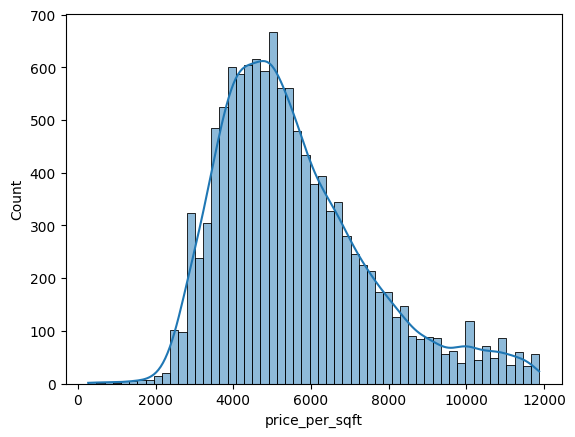

In [23]:
sns.histplot(data=df_iqr_outliers_removed,x=df_iqr_outliers_removed.price_per_sqft,kde=True)

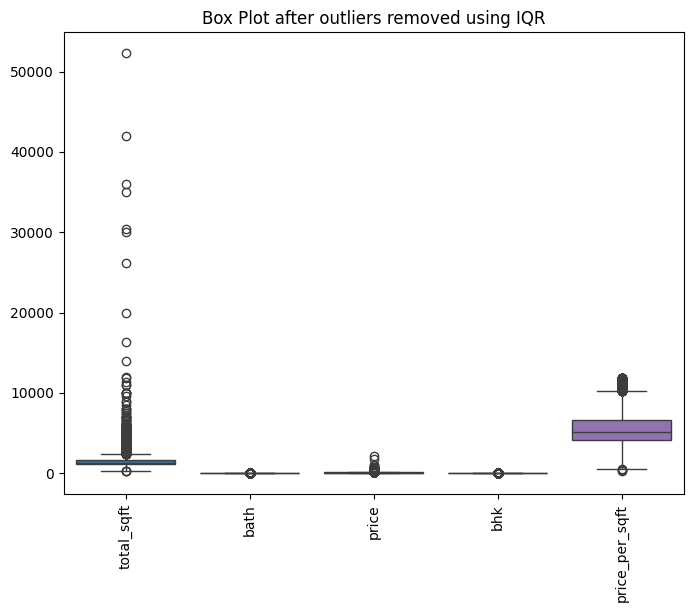

In [42]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_iqr_outliers_removed)
plt.title('Box Plot after outliers removed using IQR')
plt.xticks(rotation=90)
plt.show()

## NORMAL DISTRIBUTION

In [26]:
normal_mean = df['price_per_sqft'].mean()
normal_std = df['price_per_sqft'].std()
df_normal_distribution_outliers_removed = df[(df['price_per_sqft'] >= normal_mean - 3 * normal_std) & (df['price_per_sqft'] <= normal_mean + 3 * normal_std)]


In [27]:
rows_removed_normal = df.shape[0] - df_normal_distribution_outliers_removed.shape[0]

In [28]:
rows_removed_normal,df_normal_distribution_outliers_removed.describe()

(5,
          total_sqft         bath         price           bhk  price_per_sqft
 count  13195.000000  13195.00000  13195.000000  13195.000000    13195.000000
 mean    1555.884482      2.69064    112.267415      2.800152     6713.708602
 std     1237.196807      1.33853    149.200669      1.292344     4876.727718
 min       15.000000      1.00000      8.000000      1.000000      267.000000
 25%     1100.000000      2.00000     50.000000      2.000000     4266.500000
 50%     1275.000000      2.00000     71.740000      3.000000     5434.000000
 75%     1672.500000      3.00000    120.000000      3.000000     7313.000000
 max    52272.000000     40.00000   3600.000000     43.000000   200000.000000)

In [29]:
df_normal_distribution_outliers_removed

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


<Axes: xlabel='price_per_sqft', ylabel='Count'>

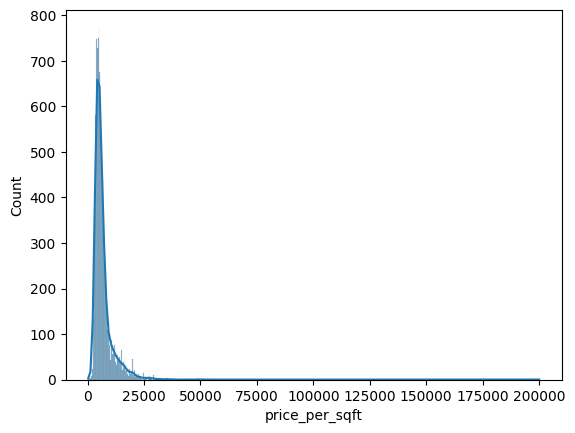

In [30]:
sns.histplot(data=df_normal_distribution_outliers_removed,x=df_normal_distribution_outliers_removed.price_per_sqft,kde=True)

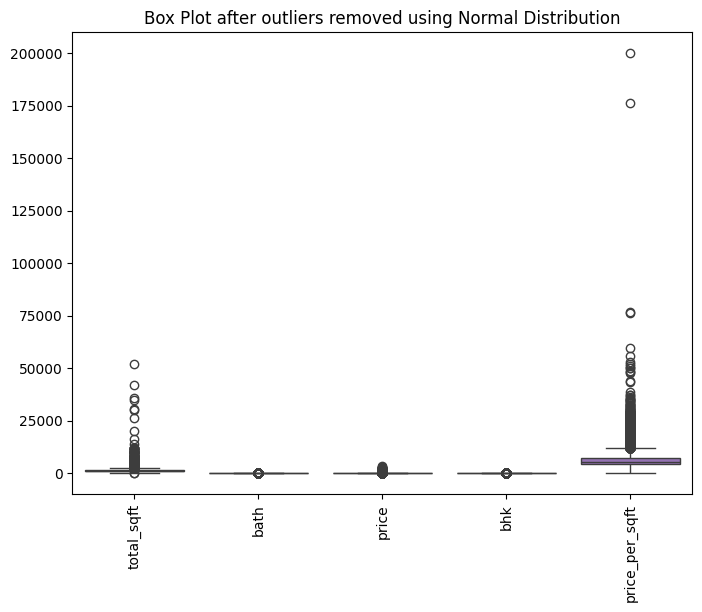

In [43]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_normal_distribution_outliers_removed)
plt.title('Box Plot after outliers removed using Normal Distribution')
plt.xticks(rotation=90)
plt.show()

5 rows has been removed using Normal Distribution

## Z SCORE

In [32]:
df["Zscore"]= (df.price_per_sqft-normal_mean)/normal_std
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft,Zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039553
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.030970
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.033875
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.015697
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.034390
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,-0.011537
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,0.029896
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.024945
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.023299


In [33]:
df_z_score_outliers_removed = df[(df.Zscore > -3) & (df.Zscore < 3)]

In [34]:
rows_removed_z_score_outliers=df.shape[0]- df_z_score_outliers_removed .shape[0]

In [35]:
rows_removed_z_score_outliers,df_z_score_outliers_removed.describe()

(5,
          total_sqft         bath         price           bhk  price_per_sqft  \
 count  13195.000000  13195.00000  13195.000000  13195.000000    13195.000000   
 mean    1555.884482      2.69064    112.267415      2.800152     6713.708602   
 std     1237.196807      1.33853    149.200669      1.292344     4876.727718   
 min       15.000000      1.00000      8.000000      1.000000      267.000000   
 25%     1100.000000      2.00000     50.000000      2.000000     4266.500000   
 50%     1275.000000      2.00000     71.740000      3.000000     5434.000000   
 75%     1672.500000      3.00000    120.000000      3.000000     7313.000000   
 max    52272.000000     40.00000   3600.000000     43.000000   200000.000000   
 
              Zscore  
 count  13195.000000  
 mean      -0.011306  
 std        0.045693  
 min       -0.071709  
 25%       -0.034235  
 50%       -0.023296  
 75%       -0.005691  
 max        1.799726  )

In [32]:
df_z_score_outliers_removed

,location,size,total_sqft,bath,price,bhk,price_per_sqft,Zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039553
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.030970
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.033875
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.015697
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.034390
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,-0.011537
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,0.029896
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.024945
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.023299


<Axes: xlabel='price_per_sqft', ylabel='Count'>

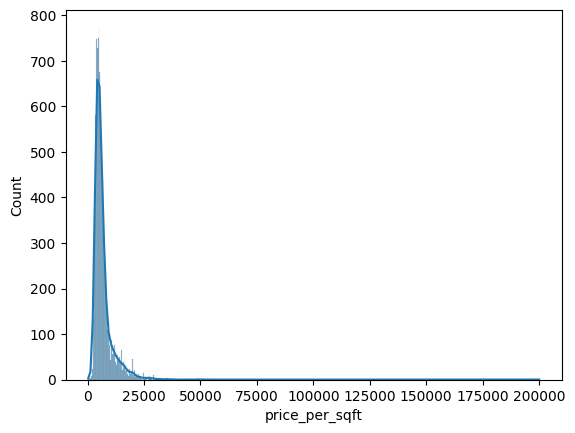

In [36]:
sns.histplot(data=df_z_score_outliers_removed,x=df_z_score_outliers_removed.price_per_sqft,kde=True)

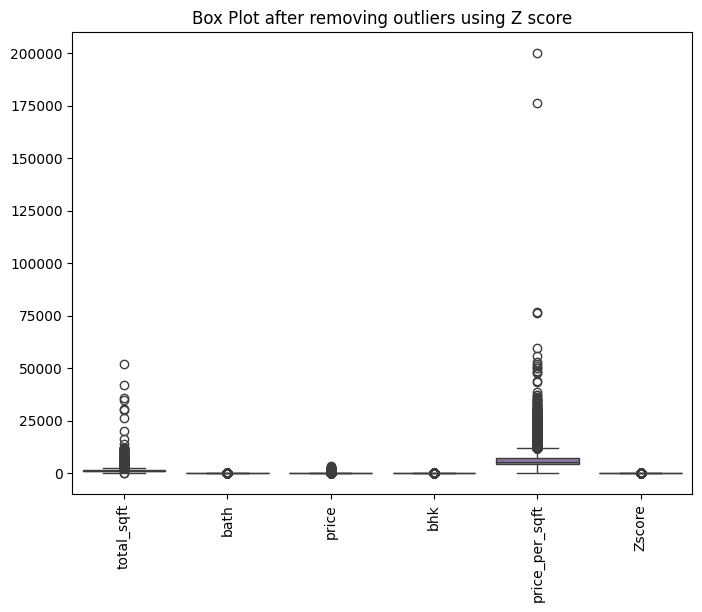

In [44]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_z_score_outliers_removed)
plt.title('Box Plot after removing outliers using Z score')
plt.xticks(rotation=90)
plt.show()

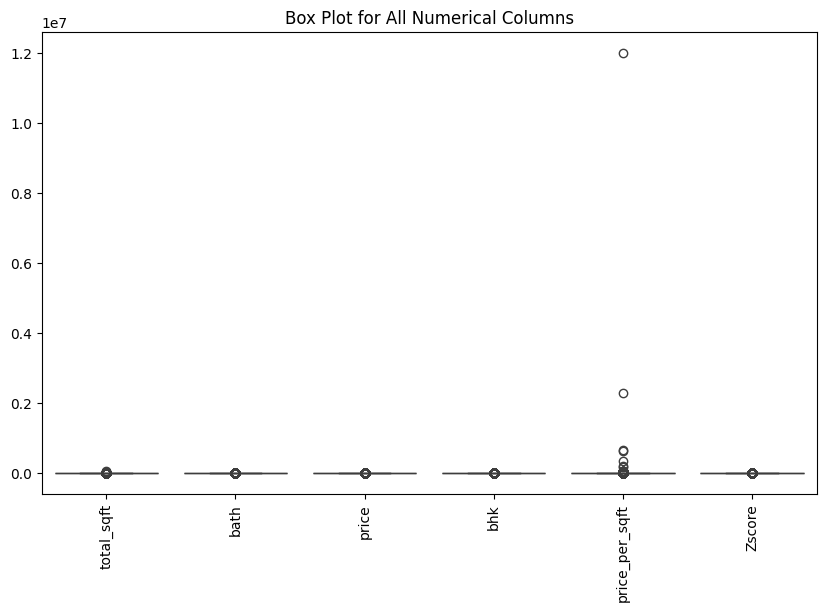

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Box Plot for All Numerical Columns')
plt.xticks(rotation=90)
plt.show()

In [50]:
corrnew=df.drop(columns=["location","size",],axis=1)
corrnew

,total_sqft,bath,price,bhk,price_per_sqft,Zscore
0,1056.0,2.0,39.07,2,3699,-0.039553
1,2600.0,5.0,120.00,4,4615,-0.030970
2,1440.0,2.0,62.00,3,4305,-0.033875
3,1521.0,3.0,95.00,3,6245,-0.015697
4,1200.0,2.0,51.00,2,4250,-0.034390
...,...,...,...,...,...,...
13195,3453.0,4.0,231.00,5,6689,-0.011537
13196,3600.0,5.0,400.00,4,11111,0.029896
13197,1141.0,2.0,60.00,2,5258,-0.024945
13198,4689.0,4.0,488.00,4,10407,0.023299


In [51]:
corr1=corrnew.corr()
corr1

,total_sqft,bath,price,bhk,price_per_sqft,Zscore
total_sqft,1.000000,0.392743,0.574330,0.346013,-0.008267,-0.008267
bath,0.392743,1.000000,0.455998,0.897951,0.030883,0.030883
price,0.574330,0.455998,1.000000,0.396883,0.028387,0.028387
bhk,0.346013,0.897951,0.396883,1.000000,0.030955,0.030955
price_per_sqft,-0.008267,0.030883,0.028387,0.030955,1.000000,1.000000
Zscore,-0.008267,0.030883,0.028387,0.030955,1.000000,1.000000


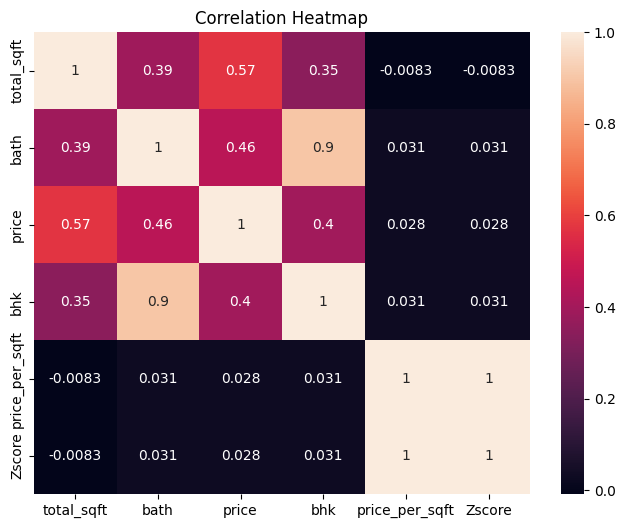

In [55]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr1,annot=True)
plt.title('Correlation Heatmap')
plt.show()

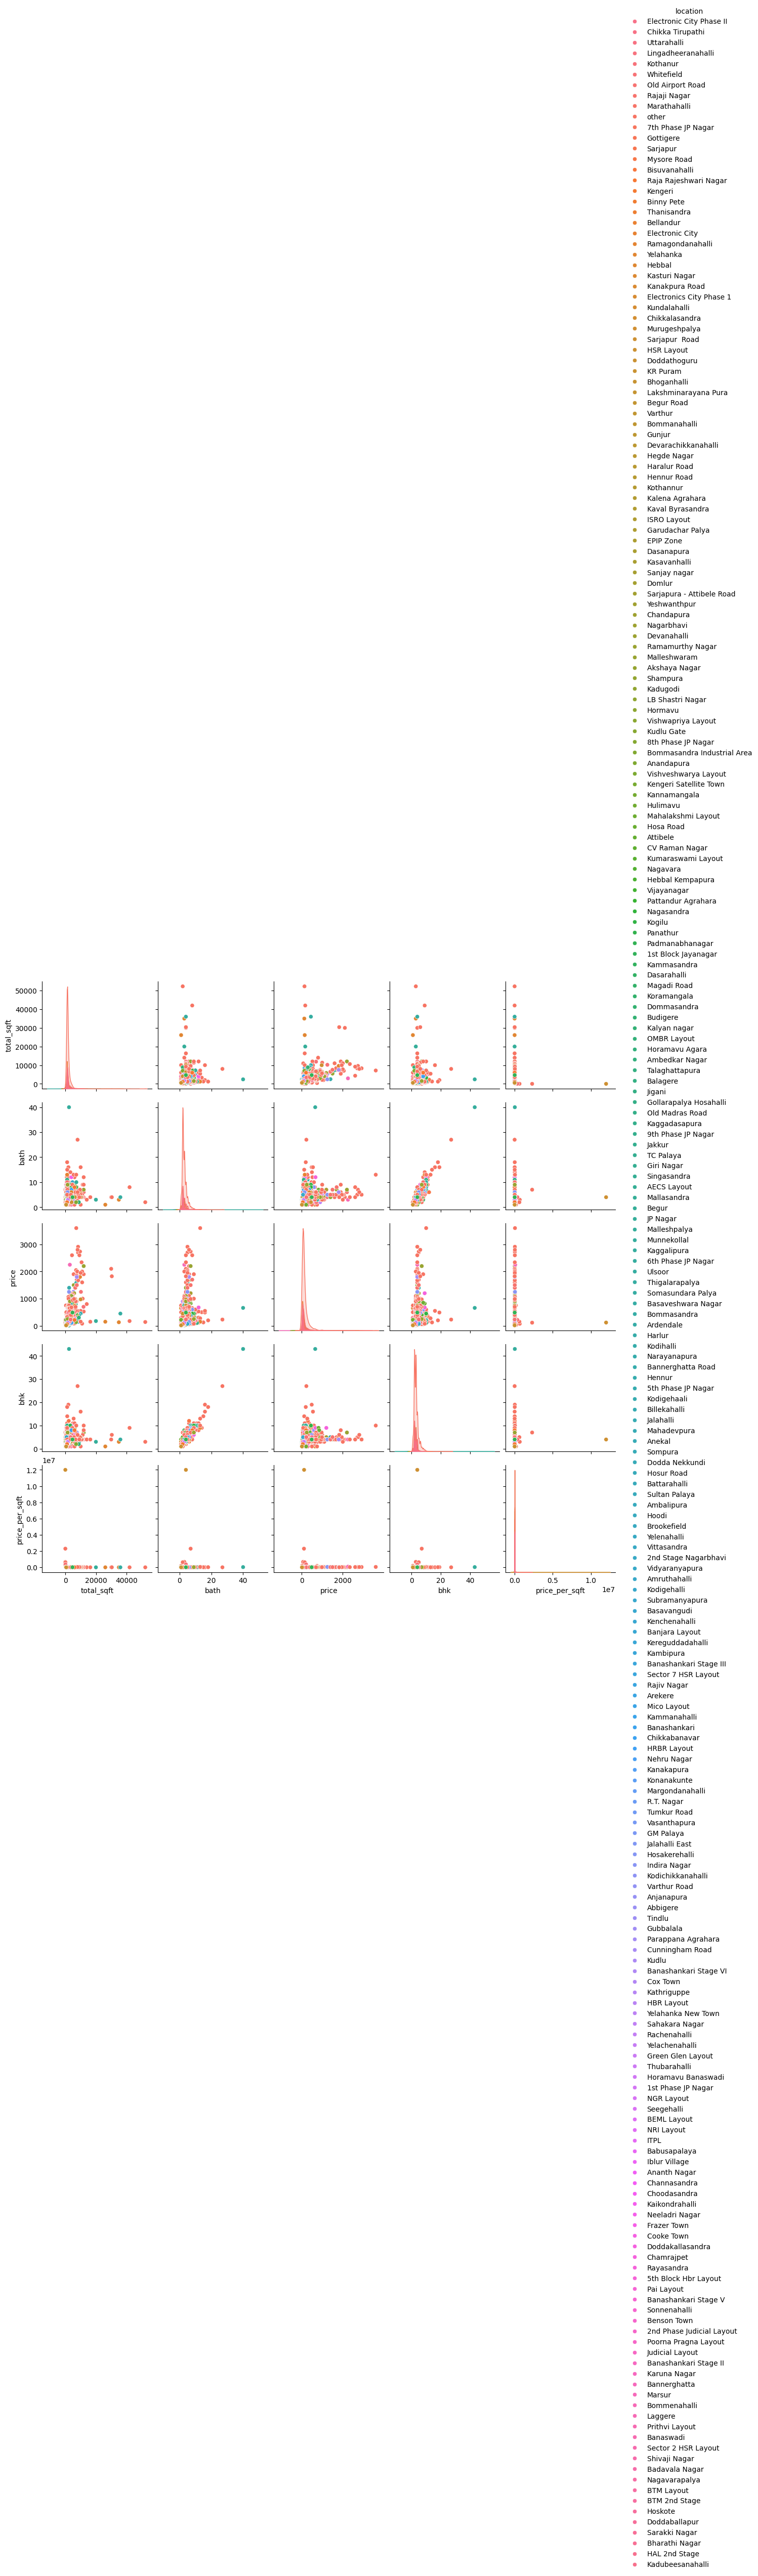

In [3]:
sns.pairplot(df,hue='location')
plt.show()